## Creating Imbalanced Dataset

In [1]:
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12, n_redundant=0)
## X is independent features
## y is target(dependent) feature
X,y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [9]:
import pandas as pd

In [10]:
## Create DataFrame for independent feature and target feature

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

## Concat vertically 

final_df = pd.concat([df1, df2], axis=1)

final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [5]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

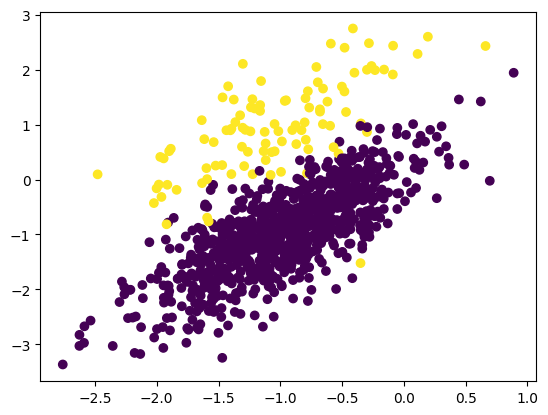

In [7]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

## c is the color parameter

## Oversampling using SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

In [11]:
X, y = oversample.fit_resample(
    final_df[['f1', 'f2']],
    final_df['target']
)


In [12]:
X, y

(            f1        f2
 0    -0.762898 -0.706808
 1    -1.075436 -1.051162
 2    -0.610115 -0.909802
 3    -2.023284 -0.428945
 4    -0.812921 -1.316206
 ...        ...       ...
 1795 -0.447085  0.713489
 1796 -1.286429  1.210579
 1797 -0.431114  2.478252
 1798 -0.518761  1.632501
 1799 -1.397855  1.567456
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: target, Length: 1800, dtype: int32)

In [13]:
X.shape, y.shape

((1800, 2), (1800,))

In [15]:
balanced_X = pd.DataFrame(X)
balanced_y = pd.DataFrame(y)

balanced_X, balanced_y

(            f1        f2
 0    -0.762898 -0.706808
 1    -1.075436 -1.051162
 2    -0.610115 -0.909802
 3    -2.023284 -0.428945
 4    -0.812921 -1.316206
 ...        ...       ...
 1795 -0.447085  0.713489
 1796 -1.286429  1.210579
 1797 -0.431114  2.478252
 1798 -0.518761  1.632501
 1799 -1.397855  1.567456
 
 [1800 rows x 2 columns],
       target
 0          0
 1          0
 2          0
 3          1
 4          0
 ...      ...
 1795       1
 1796       1
 1797       1
 1798       1
 1799       1
 
 [1800 rows x 1 columns])

In [16]:
balanced_df = pd.concat([balanced_X, balanced_y], axis=1)

balanced_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-0.447085,0.713489,1
1796,-1.286429,1.210579,1
1797,-0.431114,2.478252,1
1798,-0.518761,1.632501,1


In [17]:
balanced_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

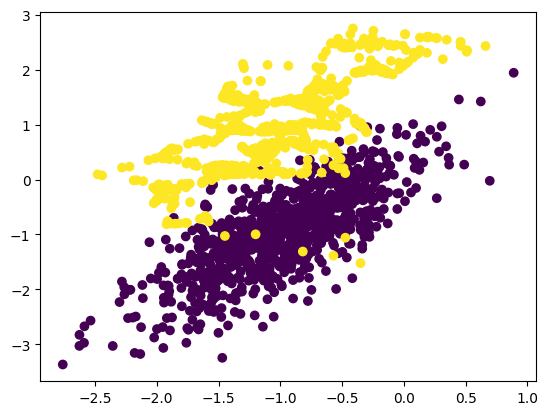

In [19]:
plt.scatter(balanced_df['f1'], balanced_df['f2'], c=balanced_df['target'])